In [1]:
from tensorflow import set_random_seed
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
#-----------------------------------------------------------------------------
# Define custom loss functions for regression in Keras 
#-----------------------------------------------------------------------------

# root mean squared error (rmse) for regression
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

In [3]:
#-----------------------------------------------------------------------------
# Start a simple Keras sequential model
#-----------------------------------------------------------------------------

# set the seeds for reproducible results with TF (wont work with GPU, only CPU)
np.random.seed(12345)
# set the TF seed
set_random_seed(12345)
# Import data, assign seed for same results, do train/test split 80/20
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(seed=12345, test_split=0.2)

# built Keras sequential model 
model = Sequential()
# add batch normalization
model.add(BatchNormalization())
# add layer to the MLP for data (404,13) 
model.add(Dense(units=300, activation='relu', input_dim=x_train.shape[1]))
# add output layer
model.add(Dense(units=1, activation='relu'))
# compile regression model loss should be mean_squared_error //
model.compile(optimizer="Nadam", loss="mean_squared_error", metrics=["mean_squared_error", rmse, r_square])
# enable early stopping based on mean_squared_error
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
# fit model
result = model.fit(x_train, y_train, epochs=240, batch_size=5, validation_data=(x_test, y_test), callbacks=[earlystopping])
# get predictions
y_pred = model.predict(x_test)

57344/57026 [==============================] - 1s 11us/step


W0710 16:15:47.858676 15256 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0710 16:15:47.858676 15256 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0710 16:15:47.903510 15256 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 16:15:47.993162 15256 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_wi

Train on 404 samples, validate on 102 samples
Epoch 1/240
404/404 [==============================] - 1s 1ms/step - loss: 311.8985 - mean_squared_error: 311.8985 - rmse: 14.6628 - r_square: -8.0889 - val_loss: 101.8619 - val_mean_squared_error: 101.8619 - val_rmse: 7.5220 - val_r_square: -2.9338
Epoch 2/240
404/404 [==============================] - 0s 349us/step - loss: 83.8632 - mean_squared_error: 83.8632 - rmse: 7.0148 - r_square: -1.9721 - val_loss: 48.4214 - val_mean_squared_error: 48.4214 - val_rmse: 5.2480 - val_r_square: -0.9777
Epoch 3/240
404/404 [==============================] - 0s 371us/step - loss: 58.0077 - mean_squared_error: 58.0077 - rmse: 5.9041 - r_square: -1.1898 - val_loss: 32.8356 - val_mean_squared_error: 32.8356 - val_rmse: 4.1282 - val_r_square: -0.2455
Epoch 4/240
404/404 [==============================] - 0s 349us/step - loss: 47.5183 - mean_squared_error: 47.5183 - rmse: 5.3517 - r_square: -0.7259 - val_loss: 29.4391 - val_mean_squared_error: 29.4391 - val_

404/404 [==============================] - 0s 376us/step - loss: 32.5702 - mean_squared_error: 32.5702 - rmse: 4.2787 - r_square: -0.0775 - val_loss: 20.0073 - val_mean_squared_error: 20.0073 - val_rmse: 2.8234 - val_r_square: 0.5319
Epoch 35/240
404/404 [==============================] - 0s 351us/step - loss: 28.8650 - mean_squared_error: 28.8650 - rmse: 3.9598 - r_square: -0.0110 - val_loss: 19.8548 - val_mean_squared_error: 19.8548 - val_rmse: 2.8390 - val_r_square: 0.5132
Epoch 36/240
404/404 [==============================] - 0s 354us/step - loss: 29.5319 - mean_squared_error: 29.5319 - rmse: 4.0296 - r_square: -0.1474 - val_loss: 21.0769 - val_mean_squared_error: 21.0769 - val_rmse: 3.2252 - val_r_square: 0.4174
Epoch 37/240
404/404 [==============================] - 0s 312us/step - loss: 26.7317 - mean_squared_error: 26.7317 - rmse: 3.9220 - r_square: 0.1014 - val_loss: 19.8266 - val_mean_squared_error: 19.8266 - val_rmse: 2.9019 - val_r_square: 0.4773
Epoch 38/240
404/404 [====

404/404 [==============================] - 0s 544us/step - loss: 25.7599 - mean_squared_error: 25.7599 - rmse: 3.8048 - r_square: -0.2720 - val_loss: 18.4894 - val_mean_squared_error: 18.4894 - val_rmse: 2.7125 - val_r_square: 0.5363
Epoch 101/240
404/404 [==============================] - 0s 517us/step - loss: 24.1157 - mean_squared_error: 24.1157 - rmse: 3.5673 - r_square: 0.2992 - val_loss: 18.0883 - val_mean_squared_error: 18.0883 - val_rmse: 2.7099 - val_r_square: 0.5445
Epoch 102/240
404/404 [==============================] - 0s 467us/step - loss: 25.2706 - mean_squared_error: 25.2706 - rmse: 3.6280 - r_square: 0.0345 - val_loss: 17.7648 - val_mean_squared_error: 17.7648 - val_rmse: 2.8560 - val_r_square: 0.5796
Epoch 103/240
404/404 [==============================] - 0s 413us/step - loss: 24.0816 - mean_squared_error: 24.0816 - rmse: 3.5881 - r_square: 0.0451 - val_loss: 19.9638 - val_mean_squared_error: 19.9638 - val_rmse: 3.1277 - val_r_square: 0.4419
Epoch 104/240
404/404 [==

404/404 [==============================] - 0s 381us/step - loss: 26.2207 - mean_squared_error: 26.2207 - rmse: 3.7462 - r_square: -0.7449 - val_loss: 14.3780 - val_mean_squared_error: 14.3780 - val_rmse: 2.3950 - val_r_square: 0.6973
Epoch 167/240
404/404 [==============================] - 0s 314us/step - loss: 29.1068 - mean_squared_error: 29.1068 - rmse: 3.9074 - r_square: -0.2274 - val_loss: 16.6708 - val_mean_squared_error: 16.6708 - val_rmse: 2.6283 - val_r_square: 0.5538
Epoch 168/240
404/404 [==============================] - 0s 341us/step - loss: 24.8680 - mean_squared_error: 24.8680 - rmse: 3.7016 - r_square: -0.8031 - val_loss: 14.9632 - val_mean_squared_error: 14.9632 - val_rmse: 2.3831 - val_r_square: 0.6518
Epoch 169/240
404/404 [==============================] - 0s 326us/step - loss: 27.9189 - mean_squared_error: 27.9189 - rmse: 3.8947 - r_square: -0.2415 - val_loss: 14.7186 - val_mean_squared_error: 14.7186 - val_rmse: 2.5472 - val_r_square: 0.6824
Epoch 170/240
404/404 

Epoch 232/240
404/404 [==============================] - 0s 356us/step - loss: 24.4217 - mean_squared_error: 24.4217 - rmse: 3.6753 - r_square: 0.1527 - val_loss: 18.0990 - val_mean_squared_error: 18.0990 - val_rmse: 2.6605 - val_r_square: 0.5297
Epoch 00232: early stopping


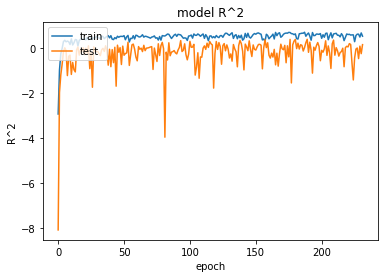

In [4]:
#-----------------------------------------------------------------------------
# Plot learning curves including R^2 and RMSE
#-----------------------------------------------------------------------------

# plot training curve for R^2 (beware of scale, starts very low negative)
plt.plot(result.history['val_r_square'])
plt.plot(result.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

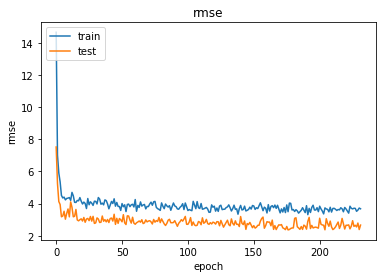

In [5]:
           
# plot training curve for rmse
plt.plot(result.history['rmse'])
plt.plot(result.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

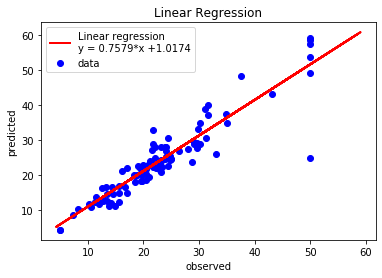

In [6]:
# print the linear regression and display datapoints
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(y_test.reshape(-1,1), y_pred)  
y_fit = regressor.predict(y_pred) 

reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)

plt.scatter(y_test, y_pred, color='blue', label= 'data')
plt.plot(y_pred, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
plt.title('Linear Regression')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()

In [7]:
#-----------------------------------------------------------------------------
# print statistical figures of merit
#-----------------------------------------------------------------------------

import sklearn.metrics, math
print("\n")
print("Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(y_test,y_pred))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_test,y_pred)))
print("R square (R^2):                 %f" % sklearn.metrics.r2_score(y_test,y_pred))



Mean absolute error (MAE):      2.660480
Mean squared error (MSE):       18.099045
Root mean squared error (RMSE): 4.254297
R square (R^2):                 0.803768
